In [1]:
import time

import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_name = 'topaz-data732--mali--www.fdesouche.com--20190101--20211231.json'

In [3]:
with open(f"../data/{file_name}", "r") as file:
    data = json.load(file)

Première approche, on associe les mots avec les articles dans une matrice

In [50]:
words_dict = data["metadata-all"]["fr"]["all"]["kws"]
words_dict = {key: val for key, val in sorted(words_dict.items(), key = lambda ele: ele[1])}

words_list = np.array(list(words_dict.keys()))
words_occurrences = np.array(list(words_dict.values()))


In [51]:
num_occ = 50
len(words_occurrences[words_occurrences >= num_occ])

107

In [52]:
words_list = words_list[words_occurrences >= num_occ]
words_occurrences = words_occurrences[words_occurrences >= num_occ]

In [53]:
words_list

array(['vendredi', 'matin', 'pologne', 'ville', 'demande', 'maroc',
       'barkhan', 'june', 'immigration', 'jeudi', 'janvier', 'sophie',
       'etat', 'territoire', 'algérie', 'libération', 'temps', 'mardi',
       'autorité', 'partie', 'réseau', 'sénégal', 'place', 'burkina',
       'point', 'origine', 'victime', 'ministre', 'zone', 'nuit',
       'europe', 'gouvernement', 'violence', 'service', 'vie', 'fin',
       'semaine', 'international', 'heure', 'musulman', 'aide', 'civil',
       'sécurité', 'fois', 'parisien', 'source', 'bamako', 'lundi',
       'politique', 'soutien', 'al', 'association', 'droit', 'polonais',
       'asile', 'presse', 'nord', 'africain', 'niger', 'monde',
       'européen', 'policier', 'étranger', 'nouveau', 'euro', 'police',
       'attentat', 'social', 'enfant', 'situation', 'pari', 'terroriste',
       'mineur', 'centre', 'afrique', 'grand', 'chef', 'mois', 'région',
       'sahel', 'djihadiste', 'président', 'attaque', 'jour', 'année',
       'femme',

In [54]:
matrix = np.zeros((data["metadata-all"]["fr"]["all"]["num"], len(words_list)))

In [55]:
article_index = 0

for year in data["data-all"].keys():
    for month in data["data-all"][year].keys():
        for day in data["data-all"][year][month].keys():
            for article in data["data-all"][year][month][day]:
                for i, word in enumerate(words_list):
                    if word in article["kws"]:
                        matrix[article_index][i] = article["kws"][word]

                article_index += 1




In [56]:
matrix

array([[ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  4., 13.,  4.],
       ...,
       [ 0.,  0.,  0., ...,  3.,  4.,  0.],
       [ 0.,  0.,  0., ..., 12.,  1.,  1.],
       [ 3.,  5., 48., ...,  3.,  4.,  1.]])

In [57]:
matrix_t = matrix.transpose()

In [58]:
g = nx.Graph()

In [59]:
node_size = np.zeros(len(words_list))

In [60]:
for word_index in range(matrix_t.shape[0]):
    g.add_node(words_list[word_index])

In [61]:
for article_index in range(matrix.shape[0]):
    for word_index in range(matrix.shape[1]):
        for word_index_2 in range(matrix.shape[1]):
            if word_index_2 == word_index:
                continue

            if matrix[article_index][word_index] == 0:
                break

            if matrix[article_index][word_index] >= 1 \
                and matrix[article_index][word_index_2] >= 1:
                g.add_edge(words_list[word_index], words_list[word_index_2], weight=
                           max(matrix[article_index][word_index], matrix[article_index][word_index_2]))

                node_size[word_index] += 1
                node_size[word_index_2] += 1


In [62]:
for node in g.nodes:
    print(nx.degree(g, node))

106
104
87
105
104
102
95
86
99
106
103
78
105
105
104
98
106
105
106
106
105
106
103
101
106
103
105
106
105
105
105
106
101
105
106
106
106
106
105
98
106
105
106
106
106
106
104
106
106
106
106
100
103
86
98
106
106
103
103
106
105
104
105
105
106
103
101
106
106
106
104
103
94
105
106
105
106
106
106
97
99
106
106
105
105
106
104
106
106
106
106
105
106
105
106
105
106
106
105
105
104
100
106
106
106
106
106


In [63]:
node_size = node_size/np.max(node_size)*1000

In [64]:
seed = 1

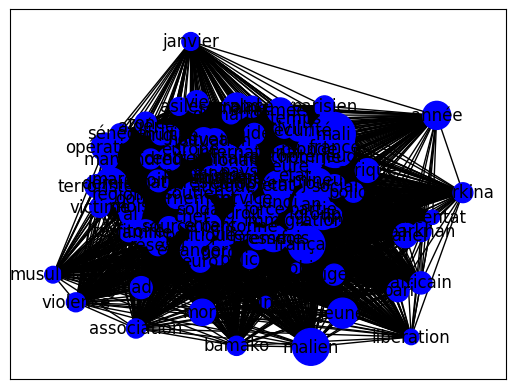

In [65]:
nx.draw_networkx(g, pos=nx.spring_layout(g, seed=seed, threshold=0.001, iterations=50), node_color="Blue", with_labels=True, node_size=node_size)

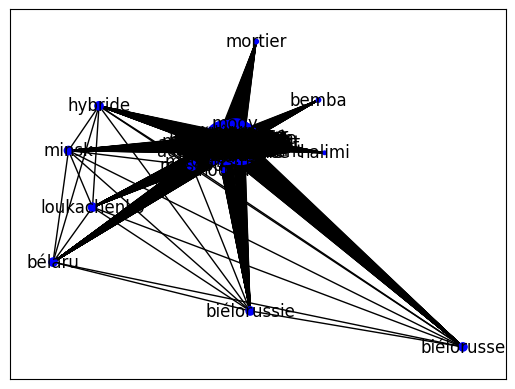

In [46]:
nx.draw_networkx(g, pos=nx.kamada_kawai_layout(g), node_color="Blue", with_labels=True, node_size=node_size)


In [ ]:
nx.draw_networkx(g, pos=nx.spiral_layout(g), node_color="Blue", edge_color="Green", with_labels=True, node_size=node_size)


Seconde approche, on associe chaques mots entre eux dans une matrice

In [ ]:
matrix_2 = np.zeros((len(words_list), len(words_list)))

In [ ]:
for year in data["data-all"].keys():
    for month in data["data-all"][year].keys():
        for day in data["data-all"][year][month].keys():
            for article in data["data-all"][year][month][day]:
                for i, word_0 in enumerate(data["metadata-all"]["fr"]["all"]["kws"]):
                    for j, word_1 in enumerate(data["metadata-all"]["fr"]["all"]["kws"]):
                        if i >= j:
                            continue
                        if word_0 in article["kws"] and word_1 in article["kws"]:
                            matrix_2[i][j] += 1



In [ ]:
matrix_2

In [ ]:
g_2 = nx.Graph()

In [ ]:
for i in range(len(matrix_2)):
    for j in  range(len(matrix_2)):
        if i >= j or i == j:
            continue

        if matrix_2[i][j] > 0:
            g_2.add_edge(words_list[i], words_list[j], weight=matrix_2[i][j])



In [ ]:
nx.draw_networkx(g_2, with_labels=False)

# Troisième approche

Distance des mots clés dans les textes


In [66]:
words_dict = data["metadata-all"]["fr"]["all"]["kws"]
words_dict = {key: val for key, val in sorted(words_dict.items(), key=lambda ele: ele[1])}

In [67]:
words_list = np.array(list(words_dict.keys()))
words_occurrences = np.array(list(words_dict.values()))

In [68]:
num_occ = 100
len(words_occurrences[words_occurrences >= num_occ])

29

In [69]:
words_list = words_list[words_occurrences >= num_occ]
words_occurrences = words_occurrences[words_occurrences >= num_occ]
words_list

array(['région', 'sahel', 'djihadiste', 'président', 'attaque', 'jour',
       'année', 'femme', 'mort', 'famille', 'soldat', 'dernier', 'armée',
       'opération', 'état', 'force', 'homme', 'militaire', 'personne',
       'groupe', 'frontière', 'jeune', 'malien', 'migrant', 'pays', 'an',
       'français', 'france', 'mali'], dtype='<U31')

In [70]:
g_3 = nx.Graph()

In [71]:
def add_edges_distance_words(g, words_list, article):
    compute_distance = False
    first_word = None

    for sentence in article["content"].split("."):
        words = sentence.split(" ")
        distance = len(words)

        for word in words:
            if compute_distance:
                distance -= 1

            if word in words_list:
                if compute_distance and word != first_word:
                    g.add_edge(word, first_word)
                    distance = len(words)
                    first_word = word
                else:
                    compute_distance = True
                    first_word = word

In [72]:
for year in data["data-all"].keys():
    for month in data["data-all"][year].keys():
        for day in data["data-all"][year][month].keys():
            for article in data["data-all"][year][month][day]:
                add_edges_distance_words(g_3, words_list, article)

In [73]:
for node in g_3.nodes:
    print(nx.degree(g_3, node))

18
20
24
13
25
24
19
22
14
19
20
10
14
21
14
13
13
18
16
22
22
7
17
20
7
14
2
2


In [74]:
node_size = np.array([nx.degree(g_3, node) for node in g_3.nodes])
node_size = node_size/np.max(node_size)*1000


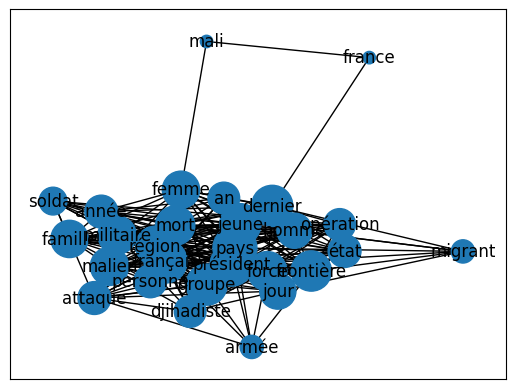

In [75]:
nx.draw_networkx(g_3, node_size=node_size)

In [76]:
seed = 10

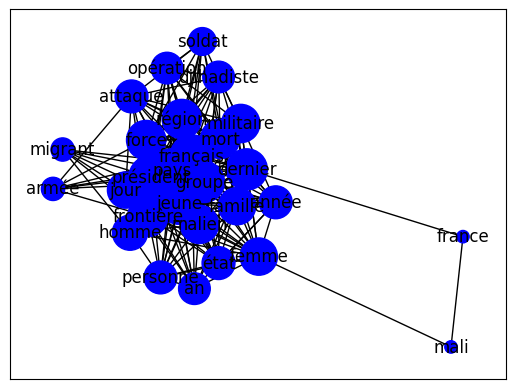

In [77]:
nx.draw_networkx(g_3, pos=nx.spring_layout(g_3, seed=seed, threshold=0.001, iterations=50), node_color="Blue", with_labels=True, node_size=node_size)

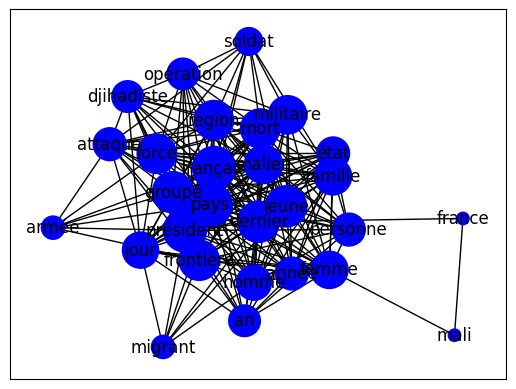

In [78]:
nx.draw_networkx(g_3, pos=nx.kamada_kawai_layout(g_3), node_color="Blue", with_labels=True, node_size=node_size)
